In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os, re

In [2]:
warnings.filterwarnings(action='ignore')

In [3]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
sample = pd.read_csv('sample_submission.csv')

In [4]:
pd.set_option('max_columns',300)
train.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False
1,31593,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False
2,5681,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,False
3,15491,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,False
4,23587,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,True


In [5]:
test.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee
0,1,Widowed,Auto,Comedy,Female,10,Daytime,United-States,0.027465,Low,No
1,4,Married-civ-spouse,Pharma,Comedy,Male,40,Morning,United-States,0.056262,High,Yes
2,5,Divorced,Entertainment,Comedy,Female,50,Morning,United-States,0.027465,Low,No
3,9,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,Low,No
4,10,Married-civ-spouse,Pharma,Comedy,Male,40,Primetime,United-States,0.027465,Low,Yes


In [6]:
sample.head(1)

,id,netgain
0,31820,True


In [7]:
print(train.shape, test.shape)

(26048, 12) (6513, 11)


In [8]:
train.rename(columns={'money_back_guarantee': 'money_back_g'}, inplace= True)
test.rename(columns={'money_back_guarantee': 'money_back_g'}, inplace= True)

In [9]:
train.describe(include = ['O','F','int64'])

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,expensive,money_back_g
count,26048.000000,26048,26048,26048,26048,26048.000000,26048,26048,26048,26048
unique,NaN,7,6,5,2,NaN,3,42,3,2
top,NaN,Married-civ-spouse,Pharma,Comedy,Male,NaN,Primetime,United-States,Low,Yes
freq,NaN,11844,10339,22258,17245,NaN,15652,23250,15693,13073
mean,16268.744779,NaN,NaN,NaN,NaN,40.294111,NaN,NaN,NaN,NaN
std,9413.578020,NaN,NaN,NaN,NaN,12.479457,NaN,NaN,NaN,NaN
min,2.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,8095.750000,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,NaN,NaN
50%,16237.000000,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,NaN,NaN
75%,24413.500000,NaN,NaN,NaN,NaN,45.000000,NaN,NaN,NaN,NaN


In [10]:
test.describe(include = ['O','F','int64'])

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,expensive,money_back_g
count,6513.000000,6513,6513,6513,6513,6513.000000,6513,6513,6513,6513
unique,NaN,7,6,5,2,NaN,3,41,3,2
top,NaN,Married-civ-spouse,Pharma,Comedy,Male,NaN,Primetime,United-States,Low,Yes
freq,NaN,3013,2614,5560,4346,NaN,3920,5807,3949,3330
mean,16330.013358,NaN,NaN,NaN,NaN,40.568095,NaN,NaN,NaN,NaN
std,9344.526074,NaN,NaN,NaN,NaN,12.575851,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,8364.000000,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,NaN,NaN
50%,16437.000000,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,NaN,NaN
75%,24444.000000,NaN,NaN,NaN,NaN,45.000000,NaN,NaN,NaN,NaN


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26048 entries, 0 to 26047
Data columns (total 12 columns):
id                                   26048 non-null int64
realtionship_status                  26048 non-null object
industry                             26048 non-null object
genre                                26048 non-null object
targeted_sex                         26048 non-null object
average_runtime(minutes_per_week)    26048 non-null int64
airtime                              26048 non-null object
airlocation                          26048 non-null object
ratings                              26048 non-null float64
expensive                            26048 non-null object
money_back_g                         26048 non-null object
netgain                              26048 non-null bool
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 2.2+ MB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6513 entries, 0 to 6512
Data columns (total 11 columns):
id                                   6513 non-null int64
realtionship_status                  6513 non-null object
industry                             6513 non-null object
genre                                6513 non-null object
targeted_sex                         6513 non-null object
average_runtime(minutes_per_week)    6513 non-null int64
airtime                              6513 non-null object
airlocation                          6513 non-null object
ratings                              6513 non-null float64
expensive                            6513 non-null object
money_back_g                         6513 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 559.8+ KB


## Cleaning

In [13]:
train.drop(columns = 'id', inplace=True)
test.drop(columns = 'id', inplace=True)

In [14]:
set(train.airlocation).difference(set(test.airlocation))

{'Holand-Netherlands'}

In [15]:
x = train[train.airlocation == 'Holand-Netherlands'].index
train.drop(index = x, inplace= True)
train.reset_index(drop = True , inplace= True)

In [16]:
train.netgain.value_counts()

False    19851
True      6195
Name: netgain, dtype: int64

In [17]:
#train['average_runtime(minutes_per_week)'] = pd.cut(
#    train['average_runtime(minutes_per_week)'],[i for i in range(0,101,5)], labels = [i for i in range(20)])

#test['average_runtime(minutes_per_week)'] = pd.cut(
#    test['average_runtime(minutes_per_week)'],[i for i in range(0,101,5)], labels = [i for i in range(20)])

In [18]:
train.head()

,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_g,netgain
0,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False
1,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False
2,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,False
3,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,False
4,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,True


## Relationship

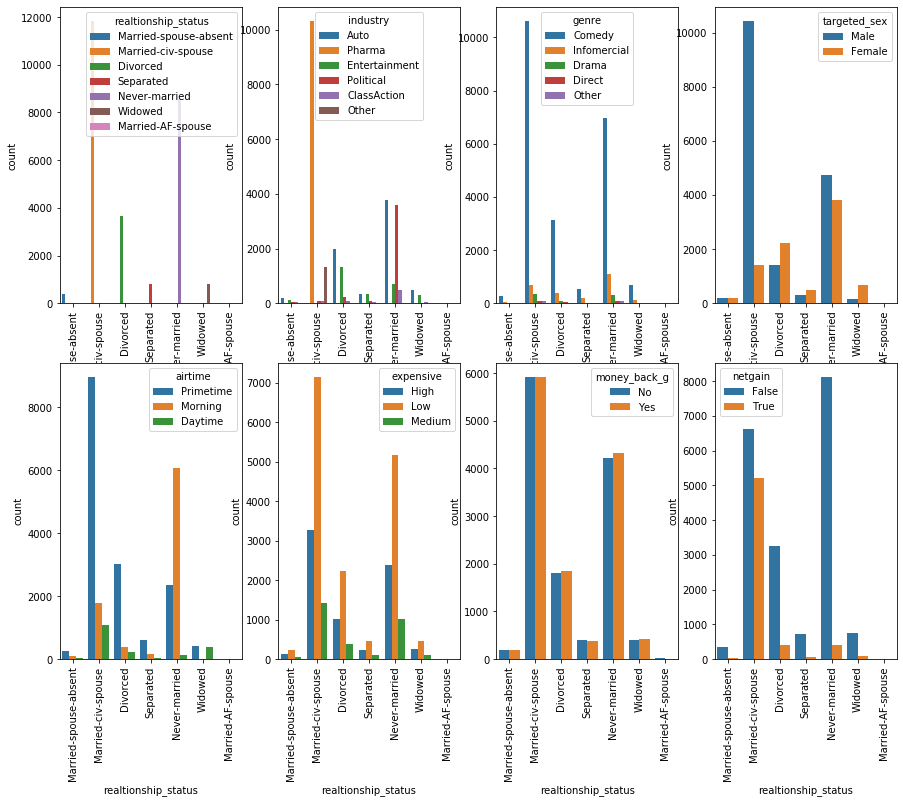

In [19]:
fig, ax = plt.subplots(2,4, figsize=(15,12))
s = 1
for i in train.columns:
    if train[i].dtype in ['O','bool'] and i not in ['airlocation'] :
        plt.subplot(2,4,s)
        sns.countplot(train.realtionship_status, hue = train[i])
        plt.xticks(rotation=90)
        s += 1

In [20]:
#train.realtionship_status.replace({'Divorced': 'Separated'}, inplace= True)
#test.realtionship_status.replace({'Divorced': 'Separated'}, inplace= True)

In [21]:
t = ['Widowed', 'Separated', 'Married-spouse-absent', 'Married-AF-spouse', 'Never-married', 'Divorced']
train['single'] = train.realtionship_status.map(lambda x: 'Yes' if x in t else 'No')
test['single'] = test.realtionship_status.map(lambda x: 'Yes' if x in t else 'No')

#train.realtionship_status.replace({'Married-AF-spouse':'Married-spouse-absent'}, inplace= True)
#test.realtionship_status.replace({'Married-AF-spouse':'Married-spouse-absent'}, inplace= True)

### Industry

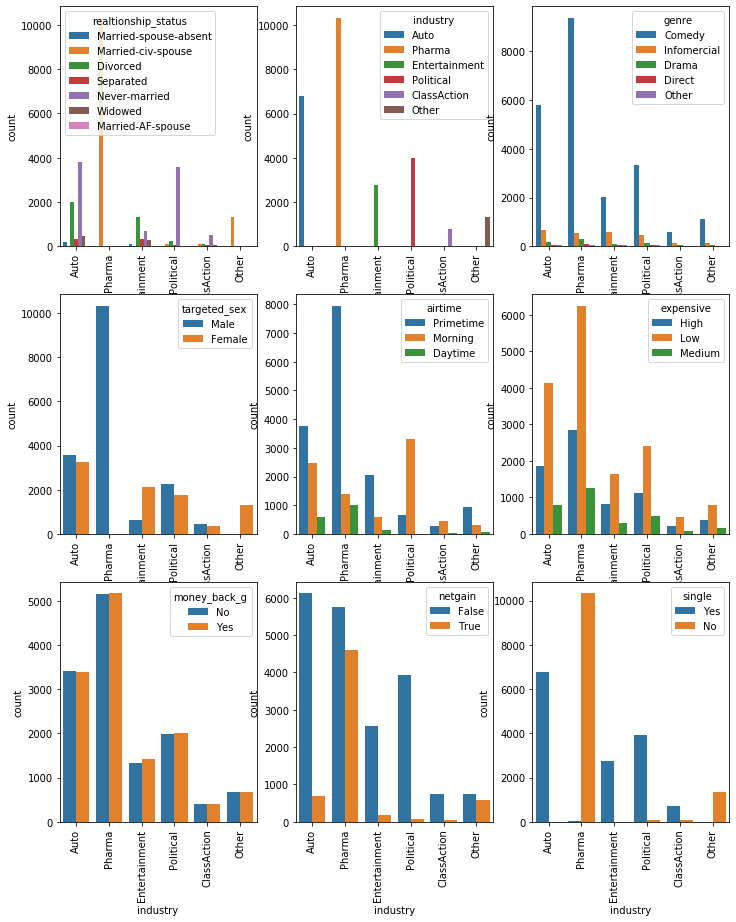

In [22]:
fig, ax = plt.subplots(3,3, figsize=(12,15))
s = 1
for i in train.columns:
    if train[i].dtype in ['O','bool'] and i not in ['airlocation'] :
        plt.subplot(3,3,s)
        sns.countplot(train.industry, hue = train[i])
        plt.xticks(rotation=90)
        s += 1

In [23]:
train.groupby('single')['industry'].value_counts()

single  industry     
No      Pharma           10324
        Other             1331
        ClassAction         94
        Political           87
        Auto                 8
Yes     Auto              6793
        Political         3927
        Entertainment     2765
        ClassAction        700
        Pharma              15
        Other                2
Name: industry, dtype: int64

In [24]:
train.groupby(['single','industry'])['netgain'].value_counts()

single  industry       netgain
No      Auto           False         8
        ClassAction    False        80
                       True         14
        Other          False       734
                       True        597
        Pharma         False      5731
                       True       4593
        Political      False        78
                       True          9
Yes     Auto           False      6109
                       True        684
        ClassAction    False       673
                       True         27
        Entertainment  False      2578
                       True        187
        Other          False         2
        Pharma         False         9
                       True          6
        Political      False      3849
                       True         78
Name: netgain, dtype: int64

### Genre

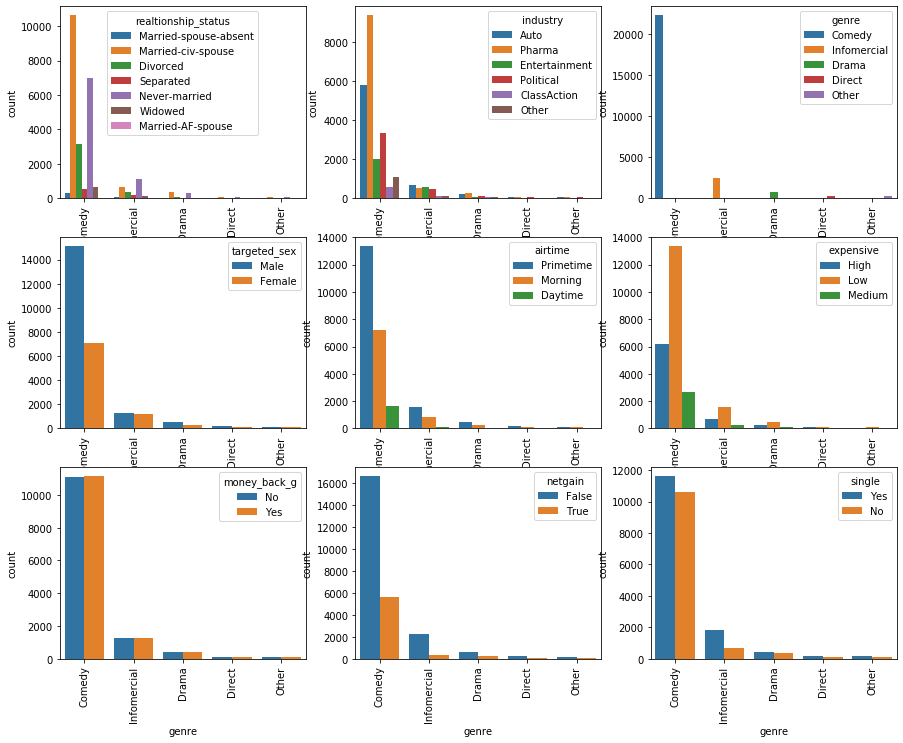

In [25]:
fig, ax = plt.subplots(3,3, figsize=(15,12))
s = 1
for i in train.columns:
    if train[i].dtype in ['O','bool'] and i not in ['airlocation'] :
        plt.subplot(3,3,s)
        sns.countplot(train.genre, hue = train[i])
        plt.xticks(rotation=90)
        s += 1

In [26]:
train.head(1)

,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_g,netgain,single
0,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False,Yes


### Target sex

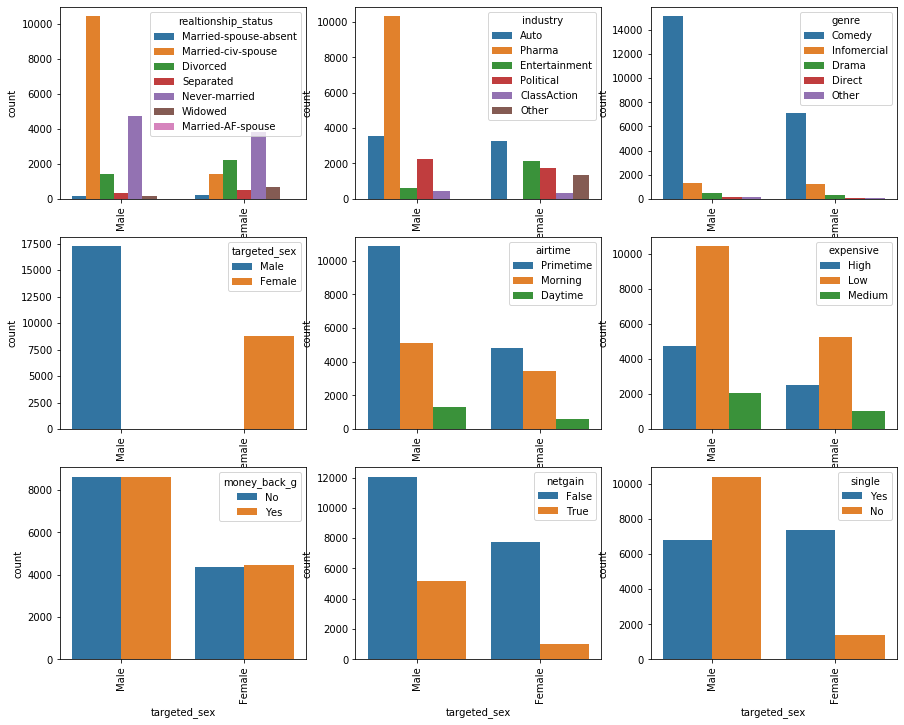

In [27]:
fig, ax = plt.subplots(3,3, figsize=(15,12))
s = 1
for i in train.columns:
    if train[i].dtype in ['O','bool'] and i not in ['airlocation'] :
        plt.subplot(3,3,s)
        sns.countplot(train.targeted_sex, hue = train[i])
        plt.xticks(rotation=90)
        s += 1

### AirTime

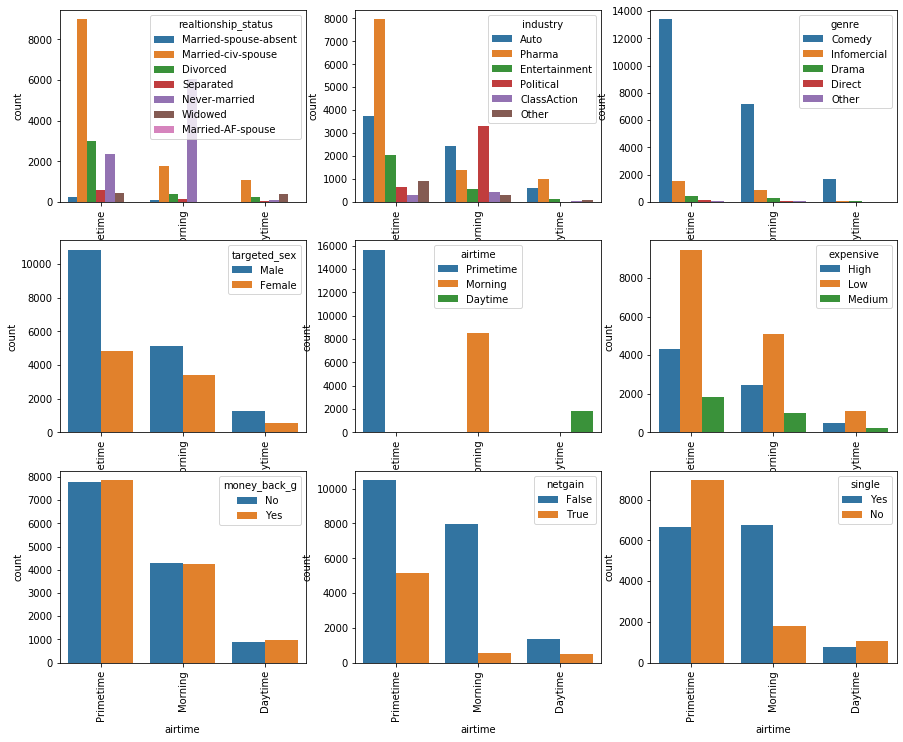

In [28]:
fig, ax = plt.subplots(3,3, figsize=(15,12))
s = 1
for i in train.columns:
    if train[i].dtype in ['O','bool'] and i not in ['airlocation'] :
        plt.subplot(3,3,s)
        sns.countplot(train.airtime, hue = train[i])
        plt.xticks(rotation=90)
        s += 1

In [29]:
train.head(1)

,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_g,netgain,single
0,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False,Yes


## Expensive

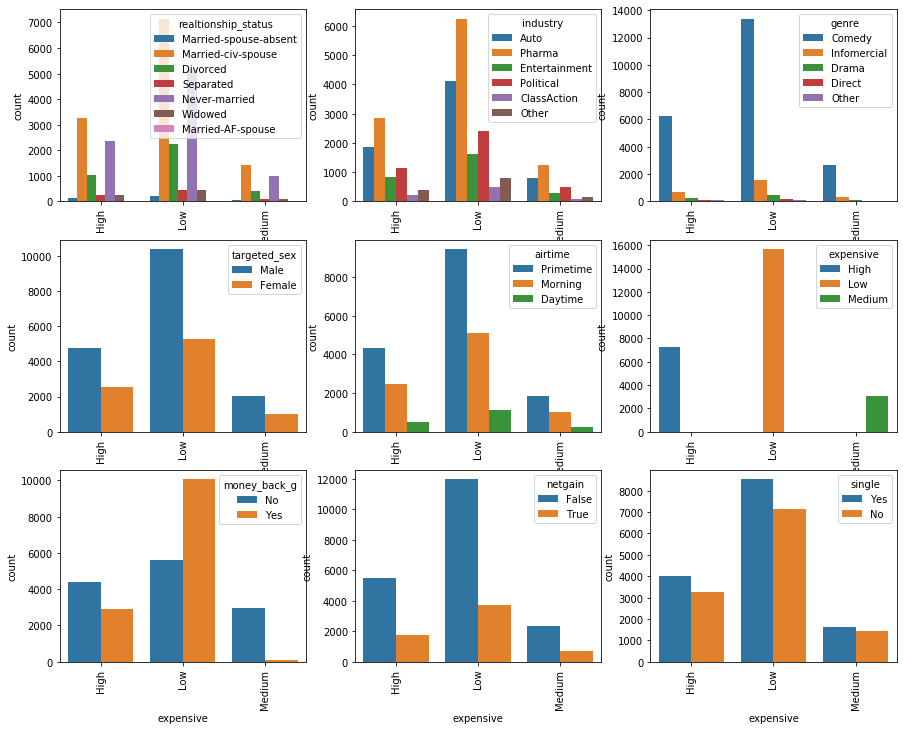

In [30]:
fig, ax = plt.subplots(3,3, figsize=(15,12))
s = 1
for i in train.columns:
    if train[i].dtype in ['O','bool'] and i not in ['airlocation'] :
        plt.subplot(3,3,s)
        sns.countplot(train.expensive, hue = train[i])
        plt.xticks(rotation=90)
        s += 1

## MoneyBack

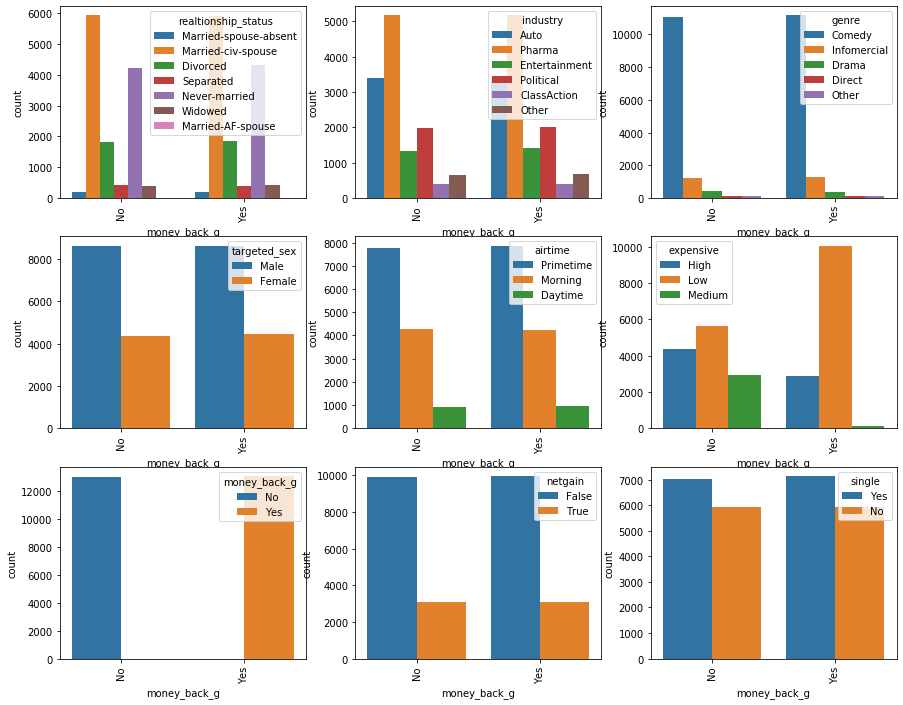

In [31]:
fig, ax = plt.subplots(3,3, figsize=(15,12))
s = 1
for i in train.columns:
    if train[i].dtype in ['O','bool'] and i not in ['airlocation'] :
        plt.subplot(3,3,s)
        sns.countplot(train.money_back_g, hue = train[i])
        plt.xticks(rotation=90)
        s += 1

In [32]:
#train.drop(columns = 'money_back_g', inplace=True)
#test.drop(columns = 'money_back_g', inplace=True)

## Netgain

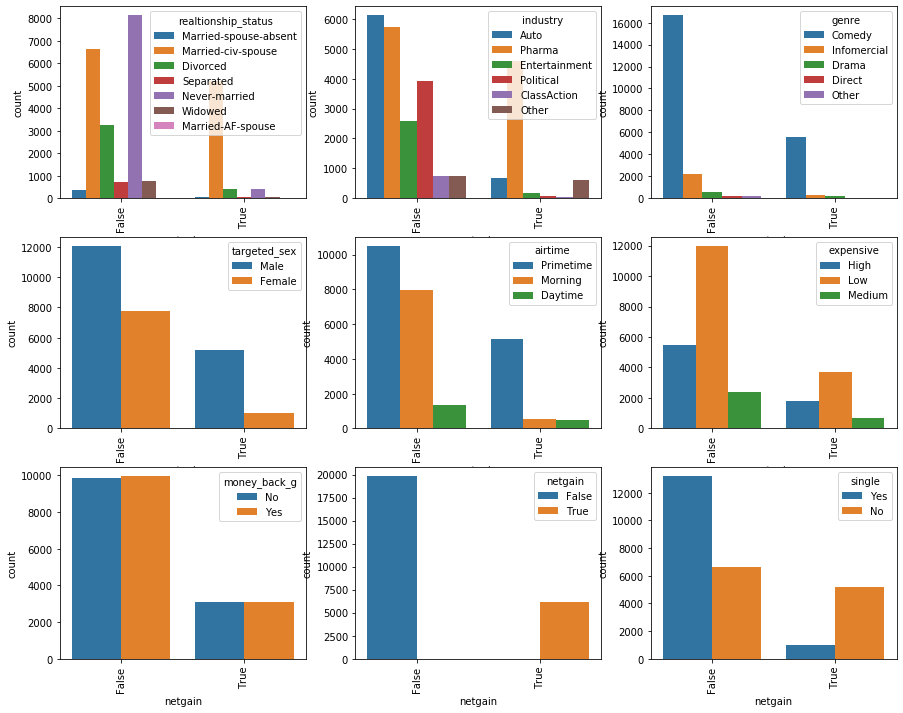

In [33]:
fig, ax = plt.subplots(3,3, figsize=(15,12))
s = 1
for i in train.columns:
    if train[i].dtype in ['O','bool'] and i not in ['airlocation'] :
        plt.subplot(3,3,s)
        sns.countplot(train.netgain, hue = train[i])
        plt.xticks(rotation=90)
        s += 1

## 'single'

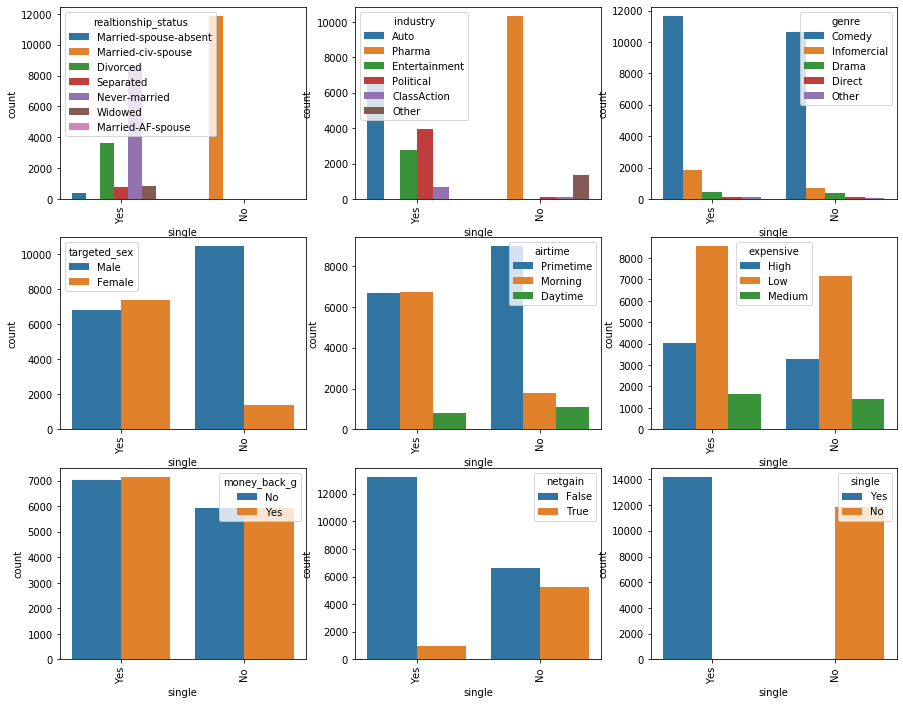

In [34]:
fig, ax = plt.subplots(3,3, figsize=(15,12))
s = 1
for i in train.columns:
    if train[i].dtype in ['O','bool'] and i not in ['airlocation'] :
        plt.subplot(3,3,s)
        sns.countplot(train.single, hue = train[i])
        plt.xticks(rotation=90)
        s += 1

In [35]:
train.head(1)

,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_g,netgain,single
0,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False,Yes


##  airlocation

## rating

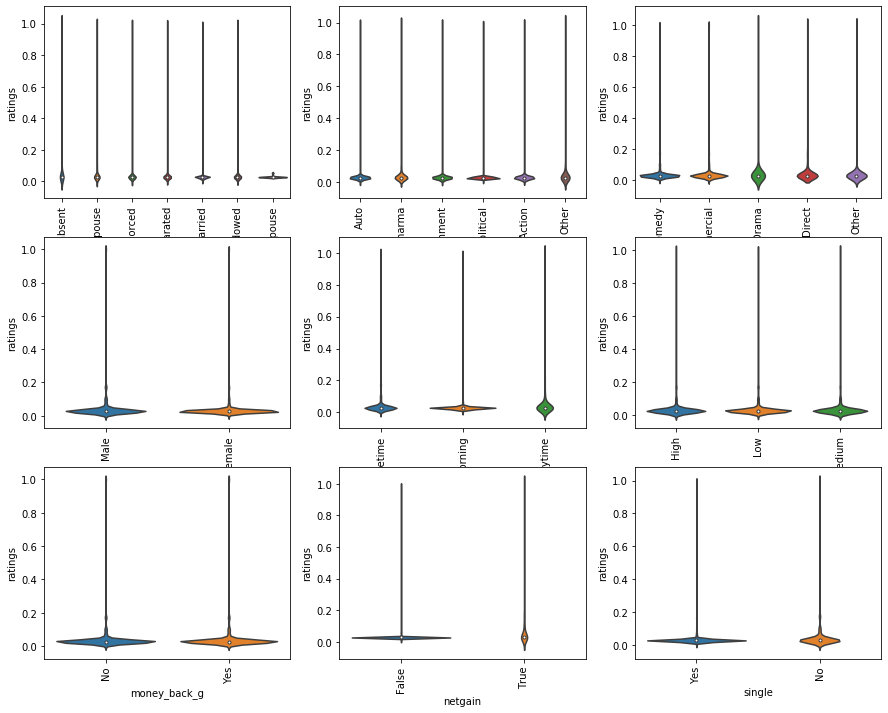

In [36]:
fig, ax = plt.subplots(3,3, figsize=(15,12))
s = 1
for i in train.columns:
    if train[i].dtype in ['O','bool'] and i not in ['airlocation'] :
        plt.subplot(3,3,s)
        sns.violinplot(y = train.ratings, x = train[i])
        plt.xticks(rotation=90)
        s += 1

In [37]:
train[train.ratings == 1].count()

realtionship_status                  143
industry                             143
genre                                143
targeted_sex                         143
average_runtime(minutes_per_week)    143
airtime                              143
airlocation                          143
ratings                              143
expensive                            143
money_back_g                         143
netgain                              143
single                               143
dtype: int64

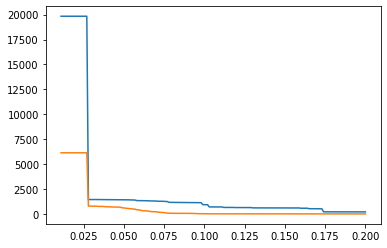

In [38]:
y = []
x = []
for i in np.arange(0.2,0.01,-0.001):
    y.append(train[train.ratings > i].netgain.value_counts().values)
    x.append(i)
plt.plot(x,y )

In [39]:
train[train.ratings>0.1].netgain.value_counts()

True     930
False     25
Name: netgain, dtype: int64

In [40]:
train['rating_good'] = train.ratings.apply(lambda x: 'yes' if x>0.1 else 'no')
test['rating_good'] = test.ratings.apply(lambda x: 'yes' if x>0.1 else 'no')

11.370284399919022 139.15088628406068


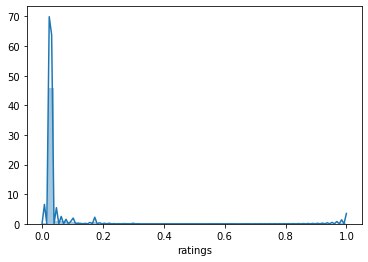

In [41]:
sns.distplot(train.ratings)
print(train.ratings.skew(), train.ratings.kurt())

5.590318000563036 6.564239464295906


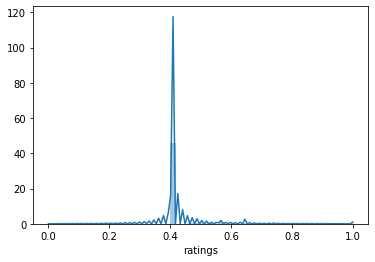

In [42]:
sns.distplot((train.ratings)**(1/4))
print(((train.ratings)**(1/4)).skew(), np.sqrt(((train.ratings)**(1/4)).kurt()))

In [43]:
#train.ratings = (train.ratings)**(1/4)
#test.ratings = (test.ratings)**(1/4)

In [44]:
train.head()

,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_g,netgain,single,rating_good
0,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False,Yes,no
1,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False,No,no
2,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,False,Yes,no
3,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,False,Yes,no
4,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,True,No,no


sns.distplot(train['average_runtime(minutes_per_week)'])
print(train['average_runtime(minutes_per_week)'].skew(), train['average_runtime(minutes_per_week)'].kurt())

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26046 entries, 0 to 26045
Data columns (total 13 columns):
realtionship_status                  26046 non-null object
industry                             26046 non-null object
genre                                26046 non-null object
targeted_sex                         26046 non-null object
average_runtime(minutes_per_week)    26046 non-null int64
airtime                              26046 non-null object
airlocation                          26046 non-null object
ratings                              26046 non-null float64
expensive                            26046 non-null object
money_back_g                         26046 non-null object
netgain                              26046 non-null bool
single                               26046 non-null object
rating_good                          26046 non-null object
dtypes: bool(1), float64(1), int64(1), object(10)
memory usage: 2.4+ MB


In [46]:
train.columns

Index(['realtionship_status', 'industry', 'genre', 'targeted_sex',
       'average_runtime(minutes_per_week)', 'airtime', 'airlocation',
       'ratings', 'expensive', 'money_back_g', 'netgain', 'single',
       'rating_good'],
      dtype='object')

In [47]:
train.realtionship_status = train.realtionship_status.astype('category')
train.industry = train.industry.astype('category')
train.genre = train.genre.astype('category')
train.targeted_sex = train.targeted_sex.astype('category')
train.airtime = train.airtime.astype('category')
train.expensive = train.expensive.astype('category')
train.money_back_g = train.money_back_g.astype('category')
train.single = train.single.astype('category')
train['average_runtime(minutes_per_week)'] = train['average_runtime(minutes_per_week)'].astype('int')
train.airlocation = train.airlocation.astype('category')

test.airlocation = test.airlocation.astype('category')
test['average_runtime(minutes_per_week)'] = test['average_runtime(minutes_per_week)'].astype('int')
test.single = test.single.astype('category')
test.realtionship_status = test.realtionship_status.astype('category')
test.industry = test.industry.astype('category')
test.genre = test.genre.astype('category')
test.targeted_sex = test.targeted_sex.astype('category')
test.airtime = test.airtime.astype('category')
test.expensive = test.expensive.astype('category')
test.money_back_g = test.money_back_g.astype('category')

#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#train.airlocation = le.fit_transform(train.airlocation)
#test.airlocation = le.transform(test.airlocation)

In [48]:
train.head(1)

,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_g,netgain,single,rating_good
0,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False,Yes,no


In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26046 entries, 0 to 26045
Data columns (total 13 columns):
realtionship_status                  26046 non-null category
industry                             26046 non-null category
genre                                26046 non-null category
targeted_sex                         26046 non-null category
average_runtime(minutes_per_week)    26046 non-null int32
airtime                              26046 non-null category
airlocation                          26046 non-null category
ratings                              26046 non-null float64
expensive                            26046 non-null category
money_back_g                         26046 non-null category
netgain                              26046 non-null bool
single                               26046 non-null category
rating_good                          26046 non-null object
dtypes: bool(1), category(9), float64(1), int32(1), object(1)
memory usage: 766.0+ KB


In [50]:
train_label = train.netgain
train.drop(columns = 'netgain', inplace=True)

In [51]:
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first= True)

In [52]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
train = pd.DataFrame(mm.fit_transform(train), columns = train.columns)
test = pd.DataFrame(mm.transform(test), columns = test.columns)

In [53]:
train.shape , test.shape

((26046, 65), (6513, 65))

In [54]:
%%time
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
#sm = SMOTE(ratio='minority')
#sm = SMOTETomek(ratio='auto')
sm = TomekLinks(ratio='majority')
x,y = sm.fit_sample(train, train_label)

Wall time: 51.9 s


In [55]:
train = pd.DataFrame(x, columns = train.columns)
train_label = pd.Series(y, name='netgain')

In [56]:
train.shape, train_label.shape

((25800, 65), (25800,))

## Feature Selection

%%time
from sklearn.feature_selection import chi2, SelectKBest, SelectFromModel, RFE
best_1 = SelectKBest(chi2, k=20)
best_1.fit(train, train_label)

from sklearn.linear_model import LogisticRegression
best_2 = RFE(LogisticRegression(), n_features_to_select=20)
best_2.fit(train, train_label)

from sklearn.ensemble import RandomForestClassifier
best_3 = SelectFromModel(RandomForestClassifier(), threshold= '1.25 *median')
best_3.fit(train, train_label)

import lightgbm as lgb
best_4 = SelectFromModel(lgb.LGBMClassifier(), max_features=20)
best_4.fit(train, train_label)

import xgboost as xgb
best_5= SelectFromModel(xgb.XGBClassifier(scale_pos_weight = 3.2), max_features=20)
best_5.fit(train, train_label)

best = pd.DataFrame({'Chi2': best_1.get_support(), 'K_Best': best_2.get_support(), 'RF': best_3.get_support(),
              'LGB': best_4.get_support(), 'XGB': best_5.get_support()})
best.head(1)

np.sum(best, axis = 1).value_counts()

train.columns = [a for a in range(26)]
test.columns = [a for a in range(26)]

x = best[np.sum(best, axis = 1)<2].index
train.drop(columns=x, inplace= True)
test.drop(columns=x, inplace=True)

In [57]:
train.shape, test.shape

((25800, 65), (6513, 65))

## ML

In [58]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier,AdaBoostClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import make_scorer, roc_auc_score, f1_score, accuracy_score, confusion_matrix, precision_recall_curve,classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedKFold
from sklearn.utils import shuffle

In [104]:
def folds(train, label, model, xg_boost = None, lg_boost = None, param = None, testset = None):
    predicted = pd.DataFrame(np.zeros(len(label)))
    predicted.columns = ['Answer']
    
    predicted_prob = pd.DataFrame(np.zeros(shape=(len(label),2)))
    
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2020)
    for t_ind, v_ind in kfold.split(train.values, label.values):
        xtrain , ytrain = train.loc[t_ind,:], label[t_ind]
        xval , yval = train.loc[v_ind,:], label[v_ind]
        
        if xg_boost is not None :
            training = xgb.DMatrix(xtrain, ytrain)
            testing = xgb.DMatrix(xval, yval)
            model = xgb.train(param , training, evals = [(training, 'training'),(testing, 'testing')],
                             num_boost_round = 7000, early_stopping_rounds = 600, verbose_eval = 5)
            predicted.loc[v_ind,'Answer'] = model.predict(testing, ntree_limit= model.best_ntree_limit)
        
        elif lg_boost is not None :
            training = lgb.Dataset(xtrain, ytrain)
            testing = lgb.Dataset(xval, yval, reference=training)
            model = lgb.train(param , training, valid_sets = [training,testing],
                             num_boost_round = 7000, early_stopping_rounds = 600, verbose_eval = 5)
            predicted.loc[v_ind,'Answer'] = model.predict(xval, best_iteration= model.best_iteration)
        
        else :
            model.fit(xtrain, ytrain)
            predicted.loc[v_ind,'Answer'] = model.predict(xval)
            predicted_prob.loc[v_ind] = model.predict_proba(xval)
    
    if xg_boost is not None or lg_boost is not None :
        fig, ax = plt.subplots(2,2,figsize=(14,8))
        precision , recall, threshold = precision_recall_curve(label, predicted)
        plt.subplot(2,2,1)
        plt.plot(precision, recall, 'g--')
        plt.title('F1 score : %s' %f1_score(label, np.where(predicted > 0.5 ,1 ,0)))
        plt.xlabel('Precision')
        plt.ylabel('Precision')

        fpr, tpr, threshold = roc_curve(label, predicted)
        plt.subplot(2,2,2)
        plt.plot(fpr, tpr,'b--')
        plt.title('AUC score : %s' %auc(fpr,tpr))
        print(confusion_matrix(label, np.where(predicted > 0.5 ,1 ,0)))
        print('Accuracy is %s' %accuracy_score(label, np.where(predicted > 0.5 ,1 ,0)))
        print('Matrix %s' %classification_report(label, np.where(predicted > 0.5 ,1 ,0)))
        
        acc = []
        f1 = []
        x = []
        for i in np.arange(0.30,0.70,0.02):
            f1.append(f1_score(np.where(predicted >= i , True, False), label))
            acc.append(accuracy_score(label, np.where(predicted >= i, True, False)))
            x.append(i)
        plt.subplot(2,2,3)
        plt.plot(x,f1)
        plt.plot(x,acc)
        plt.legend(['F1_score','Accuracy'])
        
        if xg_boost is not None:
            xgb.plot_importance(model)
        else:
            lgb.plot_importance(model)
        
    else :
        fig, ax = plt.subplots(2,2,figsize=(15,8))
        precision , recall, threshold = precision_recall_curve(label, predicted_prob.iloc[:,1])
        plt.subplot(2,2,1)
        plt.plot(precision, recall, 'g--')
        plt.title('F1 score : %s' %f1_score(label, predicted))
        plt.xlabel('Precision')
        plt.ylabel('Recall')

        fpr, tpr, threshold = roc_curve(label, predicted_prob.iloc[:,1])
        plt.subplot(2,2,2)
        plt.plot(fpr, tpr,'b--')
        plt.title('AUC score : %s' %auc(fpr,tpr))
        print(confusion_matrix(label, predicted))
        print('Accuracy is %s' %accuracy_score(label, predicted))
        print('Matrix %s' %classification_report(label, predicted))
        
        acc = []
        f1 = []
        x = []
        for i in np.arange(0.30,0.70,0.02):
            f1.append(f1_score(np.where(predicted_prob.iloc[:,1] >= i , True, False), label))
            acc.append(accuracy_score(label, np.where(predicted_prob.iloc[:,1] >= i, True, False)))
            x.append(i)
        plt.subplot(2,2,3)
        plt.plot(x,f1)
        plt.plot(x,acc)
        plt.legend(['F1_score','Accuracy'])
    if xg_boost is not None :
        df = model.predict(xgb.DMatrix(testset), ntree_limit= model.best_ntree_limit)
    elif lg_boost is not None :
        df = model.predict(testset, best_iteration = model.best_iteration)
    else:
        df = model.predict(testset)
    return(df)

In [105]:
def cv_style(train, label, model = None, test = None):
    df = pd.concat([train, label], axis =1)
    
    df_False = df[df.netgain == False]
    df_True = df[df.netgain == True]
    
    prediction_train = pd.DataFrame(np.eye(len(train.index),3))
    prediction_train.columns = [i for i in range(3)]
    prediction_test = pd.DataFrame(np.eye(6513,3))
    prediction_test.columns = [i for i in range(3)]
    
    for i,batch in enumerate(np.array_split(df_False, 3)):
        batch = pd.concat([df_False, df_True], axis = 0)
        batch = shuffle(batch)
        model.fit(batch.drop(columns = 'netgain'), batch.netgain)
    
        prediction_train.iloc[:,i] = model.predict(batch.drop(columns = 'netgain'))
        prediction_test.iloc[:,i] = model.predict(test)
    return(prediction_train, prediction_test)

### Logistic

[[14454  5151]
 [ 1039  5156]]
Accuracy is 0.7600775193798449
Matrix               precision    recall  f1-score   support

       False       0.93      0.74      0.82     19605
        True       0.50      0.83      0.62      6195

    accuracy                           0.76     25800
   macro avg       0.72      0.78      0.72     25800
weighted avg       0.83      0.76      0.78     25800



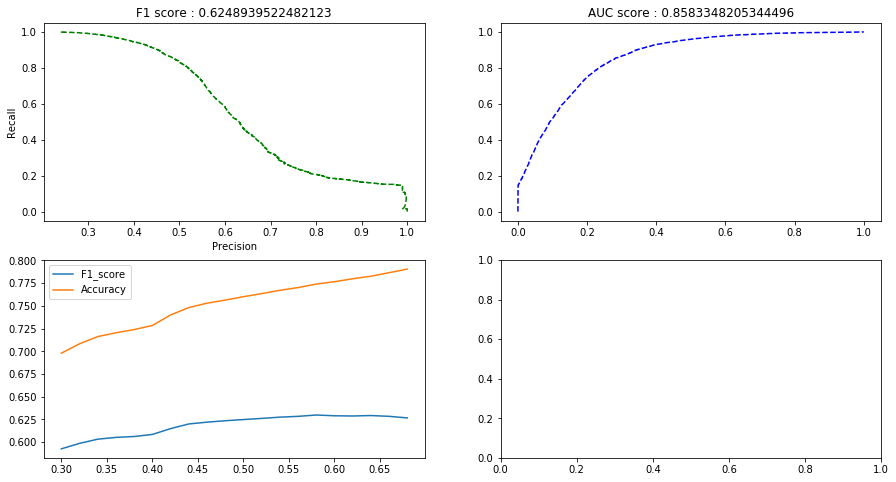

In [106]:
lg = LogisticRegression(class_weight='balanced')
answer = folds(train, train_label, lg, testset = test)

#df_train, df_test = cv_style(train, train_label, lg, test)
#for i in range(3):
#    print(accuracy_score(df_train[i], train_label))

### SGD Classifier

In [107]:
#sgd = SGDClassifier(tol = 1e-8, loss = 'huber')
#folds(train, train_label, sgd)

### DecisionTree

[[17858  1747]
 [ 3410  2785]]
Accuracy is 0.8001162790697675
Matrix               precision    recall  f1-score   support

       False       0.84      0.91      0.87     19605
        True       0.61      0.45      0.52      6195

    accuracy                           0.80     25800
   macro avg       0.73      0.68      0.70     25800
weighted avg       0.79      0.80      0.79     25800

0.6665503875968992
0.66515503875969
0.6660077519379844


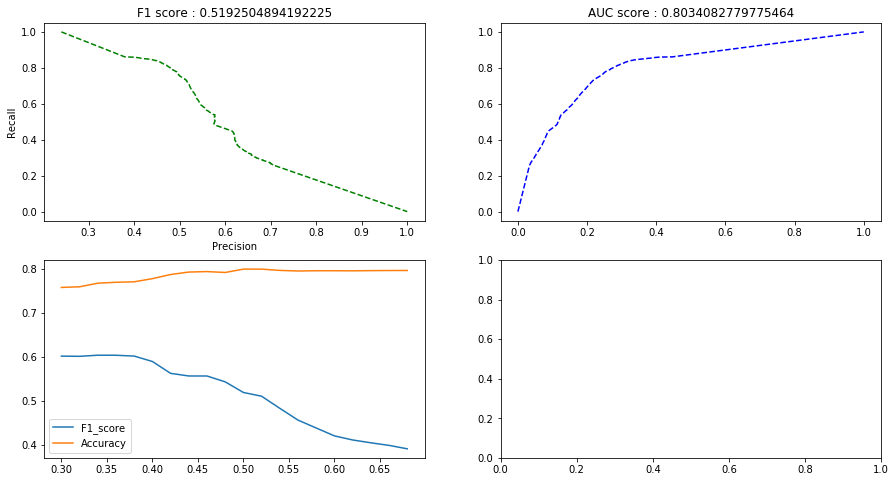

In [108]:
dtc = DecisionTreeClassifier()
folds(train, train_label, dtc, testset = test)

df_train, df_test = cv_style(train, train_label, dtc, test )
for i in range(3):
    print(accuracy_score(df_train[i], train_label))

### SVC

In [109]:
#svc = SVC(probability=True)
#folds(train, train_label, svc)

### RandomForest

[[17987  1618]
 [ 3379  2816]]
Accuracy is 0.8063178294573643
Matrix               precision    recall  f1-score   support

       False       0.84      0.92      0.88     19605
        True       0.64      0.45      0.53      6195

    accuracy                           0.81     25800
   macro avg       0.74      0.69      0.70     25800
weighted avg       0.79      0.81      0.79     25800

0.662984496124031
0.664922480620155
0.6618992248062016


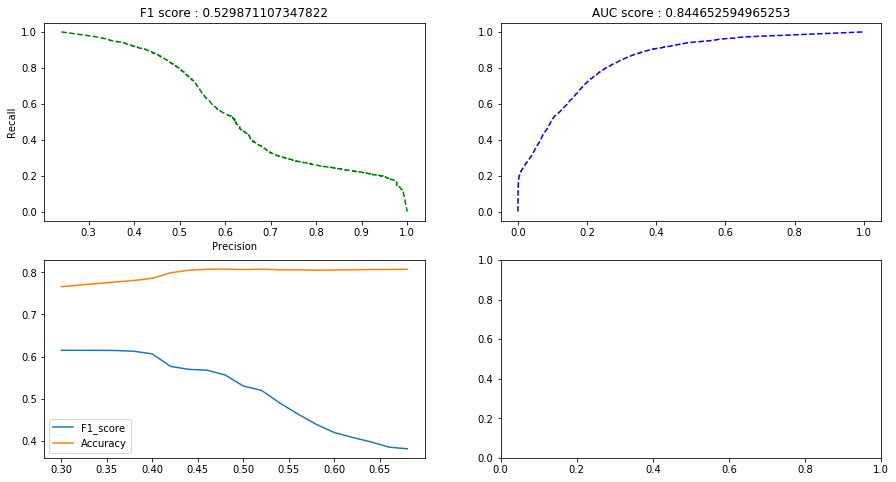

In [110]:
rf = RandomForestClassifier(n_estimators=100)
folds(train, train_label, rf, testset = test)

df_train, df_test = cv_style(train, train_label, rf, test)
for i in range(3):
    print(accuracy_score(df_train[i], train_label))

In [111]:
pd.Series(rf.feature_importances_, index = train.columns).sort_values(ascending=False)

ratings                                   0.196030
average_runtime(minutes_per_week)         0.186244
realtionship_status_Married-civ-spouse    0.093436
single_Yes                                0.091857
rating_good_yes                           0.066600
                                            ...   
airlocation_Peru                          0.000396
airlocation_Trinadad&Tobago               0.000251
airlocation_Honduras                      0.000172
airlocation_Outlying-US(Guam-USVI-etc)    0.000148
airlocation_Hungary                       0.000132
Length: 65, dtype: float64

[0]	training-auc:0.865418	testing-auc:0.862503
Multiple eval metrics have been passed: 'testing-auc' will be used for early stopping.

Will train until testing-auc hasn't improved in 600 rounds.
[5]	training-auc:0.865601	testing-auc:0.862535
[10]	training-auc:0.865975	testing-auc:0.86254
[15]	training-auc:0.866059	testing-auc:0.86252
[20]	training-auc:0.866414	testing-auc:0.862068
[25]	training-auc:0.867454	testing-auc:0.861853
[30]	training-auc:0.868017	testing-auc:0.862415
[35]	training-auc:0.868298	testing-auc:0.862302
[40]	training-auc:0.868708	testing-auc:0.862357
[45]	training-auc:0.868838	testing-auc:0.862166
[50]	training-auc:0.869102	testing-auc:0.862599
[55]	training-auc:0.869851	testing-auc:0.863168
[60]	training-auc:0.870219	testing-auc:0.863431
[65]	training-auc:0.870883	testing-auc:0.86393
[70]	training-auc:0.871029	testing-auc:0.863945
[75]	training-auc:0.871172	testing-auc:0.864007
[80]	training-auc:0.871893	testing-auc:0.864867
[85]	training-auc:0.87214	testing-auc:0.8

[830]	training-auc:0.887028	testing-auc:0.869672
[835]	training-auc:0.887056	testing-auc:0.869697
[840]	training-auc:0.887128	testing-auc:0.869689
[845]	training-auc:0.887184	testing-auc:0.869707
[850]	training-auc:0.887213	testing-auc:0.869721
[855]	training-auc:0.88727	testing-auc:0.869695
[860]	training-auc:0.887307	testing-auc:0.869752
[865]	training-auc:0.887346	testing-auc:0.869764
[870]	training-auc:0.887373	testing-auc:0.869741
[875]	training-auc:0.887407	testing-auc:0.869796
[880]	training-auc:0.887468	testing-auc:0.869783
[885]	training-auc:0.887502	testing-auc:0.869771
[890]	training-auc:0.887556	testing-auc:0.869745
[895]	training-auc:0.887596	testing-auc:0.869767
[900]	training-auc:0.887661	testing-auc:0.869742
[905]	training-auc:0.887672	testing-auc:0.869713
[910]	training-auc:0.887691	testing-auc:0.869695
[915]	training-auc:0.887712	testing-auc:0.869676
[920]	training-auc:0.887757	testing-auc:0.869693
[925]	training-auc:0.887784	testing-auc:0.869716
[930]	training-auc:0.

[425]	training-auc:0.88213	testing-auc:0.868367
[430]	training-auc:0.882193	testing-auc:0.868423
[435]	training-auc:0.882263	testing-auc:0.868469
[440]	training-auc:0.882358	testing-auc:0.868503
[445]	training-auc:0.882426	testing-auc:0.868522
[450]	training-auc:0.882523	testing-auc:0.868493
[455]	training-auc:0.882596	testing-auc:0.868482
[460]	training-auc:0.882664	testing-auc:0.86856
[465]	training-auc:0.882757	testing-auc:0.868566
[470]	training-auc:0.882905	testing-auc:0.868565
[475]	training-auc:0.882996	testing-auc:0.868584
[480]	training-auc:0.883117	testing-auc:0.868705
[485]	training-auc:0.883231	testing-auc:0.86868
[490]	training-auc:0.883308	testing-auc:0.868691
[495]	training-auc:0.883424	testing-auc:0.868681
[500]	training-auc:0.88352	testing-auc:0.868762
[505]	training-auc:0.883577	testing-auc:0.868711
[510]	training-auc:0.883631	testing-auc:0.868752
[515]	training-auc:0.883672	testing-auc:0.868792
[520]	training-auc:0.883718	testing-auc:0.868777
[525]	training-auc:0.883

[1260]	training-auc:0.891774	testing-auc:0.868896
[1265]	training-auc:0.891855	testing-auc:0.868851
[1270]	training-auc:0.891924	testing-auc:0.868851
[1275]	training-auc:0.891986	testing-auc:0.868946
[1280]	training-auc:0.892044	testing-auc:0.868949
[1285]	training-auc:0.892058	testing-auc:0.86891
[1290]	training-auc:0.892077	testing-auc:0.868927
[1295]	training-auc:0.892125	testing-auc:0.868902
[1300]	training-auc:0.892182	testing-auc:0.868871
[1305]	training-auc:0.892224	testing-auc:0.868883
[1310]	training-auc:0.892291	testing-auc:0.868849
[1315]	training-auc:0.892348	testing-auc:0.868815
[1320]	training-auc:0.892416	testing-auc:0.868808
[1325]	training-auc:0.892479	testing-auc:0.868818
[1330]	training-auc:0.892543	testing-auc:0.868834
[1335]	training-auc:0.892575	testing-auc:0.868799
[1340]	training-auc:0.892618	testing-auc:0.868798
[1345]	training-auc:0.892669	testing-auc:0.868806
[1350]	training-auc:0.892698	testing-auc:0.868829
[1355]	training-auc:0.892751	testing-auc:0.868864
[

[690]	training-auc:0.885859	testing-auc:0.866609
[695]	training-auc:0.885898	testing-auc:0.866668
[700]	training-auc:0.885943	testing-auc:0.866658
[705]	training-auc:0.886006	testing-auc:0.86665
[710]	training-auc:0.886054	testing-auc:0.866633
[715]	training-auc:0.886109	testing-auc:0.866679
[720]	training-auc:0.886217	testing-auc:0.866711
[725]	training-auc:0.886267	testing-auc:0.866753
[730]	training-auc:0.886309	testing-auc:0.866735
[735]	training-auc:0.886341	testing-auc:0.866761
[740]	training-auc:0.886427	testing-auc:0.866786
[745]	training-auc:0.886502	testing-auc:0.866829
[750]	training-auc:0.886559	testing-auc:0.866847
[755]	training-auc:0.886642	testing-auc:0.866867
[760]	training-auc:0.886686	testing-auc:0.866825
[765]	training-auc:0.886727	testing-auc:0.866814
[770]	training-auc:0.886779	testing-auc:0.866809
[775]	training-auc:0.886856	testing-auc:0.867091
[780]	training-auc:0.886889	testing-auc:0.867023
[785]	training-auc:0.886935	testing-auc:0.867003
[790]	training-auc:0.

[130]	training-auc:0.874254	testing-auc:0.863366
[135]	training-auc:0.874624	testing-auc:0.863552
[140]	training-auc:0.874885	testing-auc:0.863537
[145]	training-auc:0.875169	testing-auc:0.863598
[150]	training-auc:0.875338	testing-auc:0.8637
[155]	training-auc:0.875512	testing-auc:0.863512
[160]	training-auc:0.875742	testing-auc:0.863796
[165]	training-auc:0.875935	testing-auc:0.86404
[170]	training-auc:0.876103	testing-auc:0.864022
[175]	training-auc:0.876061	testing-auc:0.864147
[180]	training-auc:0.876148	testing-auc:0.864074
[185]	training-auc:0.876217	testing-auc:0.864297
[190]	training-auc:0.876292	testing-auc:0.864427
[195]	training-auc:0.87642	testing-auc:0.864507
[200]	training-auc:0.876527	testing-auc:0.864588
[205]	training-auc:0.876696	testing-auc:0.864708
[210]	training-auc:0.876804	testing-auc:0.864788
[215]	training-auc:0.876994	testing-auc:0.864834
[220]	training-auc:0.877225	testing-auc:0.864903
[225]	training-auc:0.877339	testing-auc:0.864949
[230]	training-auc:0.877

[40]	training-auc:0.866983	testing-auc:0.871012
[45]	training-auc:0.867976	testing-auc:0.87101
[50]	training-auc:0.8685	testing-auc:0.871264
[55]	training-auc:0.868813	testing-auc:0.871426
[60]	training-auc:0.868947	testing-auc:0.871203
[65]	training-auc:0.869537	testing-auc:0.871306
[70]	training-auc:0.870019	testing-auc:0.871748
[75]	training-auc:0.870098	testing-auc:0.871997
[80]	training-auc:0.870647	testing-auc:0.871677
[85]	training-auc:0.870936	testing-auc:0.872056
[90]	training-auc:0.871092	testing-auc:0.872373
[95]	training-auc:0.871288	testing-auc:0.872409
[100]	training-auc:0.871524	testing-auc:0.872437
[105]	training-auc:0.872333	testing-auc:0.872336
[110]	training-auc:0.872662	testing-auc:0.872589
[115]	training-auc:0.872755	testing-auc:0.872488
[120]	training-auc:0.872992	testing-auc:0.872379
[125]	training-auc:0.873292	testing-auc:0.872533
[130]	training-auc:0.87352	testing-auc:0.872862
[135]	training-auc:0.873632	testing-auc:0.872809
[140]	training-auc:0.873829	testing-

[885]	training-auc:0.887011	testing-auc:0.873356
[890]	training-auc:0.887029	testing-auc:0.87335
[895]	training-auc:0.887058	testing-auc:0.873321
[900]	training-auc:0.88713	testing-auc:0.87332
[905]	training-auc:0.887197	testing-auc:0.873315
[910]	training-auc:0.887268	testing-auc:0.873237
Stopping. Best iteration:
[310]	training-auc:0.879283	testing-auc:0.873924

[[18227  1378]
 [ 3307  2888]]
Accuracy is 0.8184108527131783
Matrix               precision    recall  f1-score   support

       False       0.85      0.93      0.89     19605
        True       0.68      0.47      0.55      6195

    accuracy                           0.82     25800
   macro avg       0.76      0.70      0.72     25800
weighted avg       0.81      0.82      0.81     25800

0.6798449612403101
0.6789147286821705
0.6751162790697675


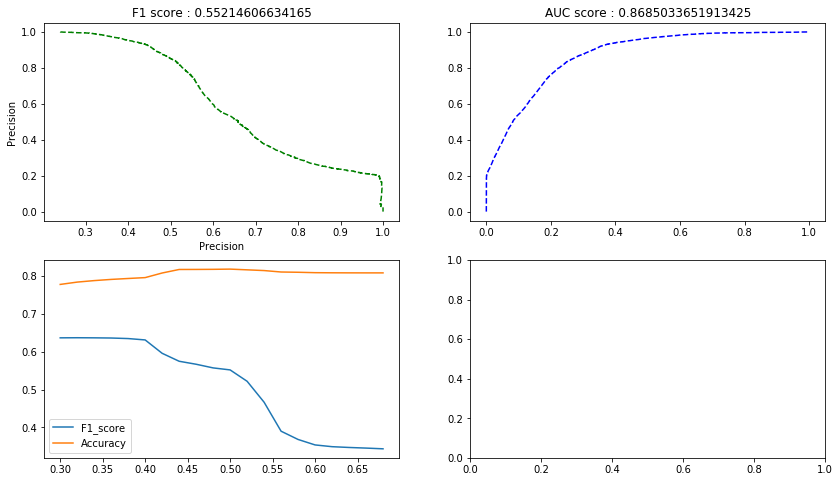

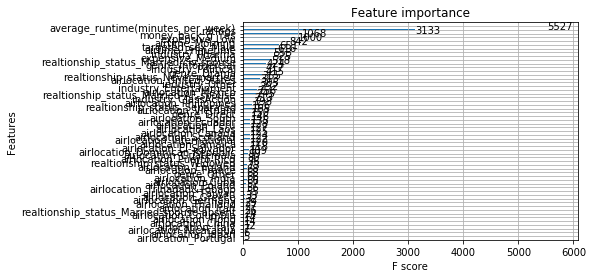

In [112]:
param = dict()
param['objective'] = 'binary:logistic'
param['eval_metric'] = 'auc'
param['seed'] = 99
param['learning_rate'] = 0.02
#param['scale_pos_weight'] = 3.2043583535108957

answer = folds(train, train_label, xgb, True, param = param, testset = test)
df_train, df_test = cv_style(train, train_label, xgb.XGBClassifier(), test)
for i in range(3):
    print(accuracy_score(df_train[i], train_label))

Training until validation scores don't improve for 600 rounds
[5]	training's auc: 0.868121	valid_1's auc: 0.862771
[10]	training's auc: 0.868247	valid_1's auc: 0.862701
[15]	training's auc: 0.868315	valid_1's auc: 0.862639
[20]	training's auc: 0.868482	valid_1's auc: 0.862989
[25]	training's auc: 0.86879	valid_1's auc: 0.863523
[30]	training's auc: 0.868707	valid_1's auc: 0.863407
[35]	training's auc: 0.868876	valid_1's auc: 0.863601
[40]	training's auc: 0.868737	valid_1's auc: 0.863368
[45]	training's auc: 0.868894	valid_1's auc: 0.863543
[50]	training's auc: 0.869161	valid_1's auc: 0.863586
[55]	training's auc: 0.869231	valid_1's auc: 0.863736
[60]	training's auc: 0.869312	valid_1's auc: 0.863577
[65]	training's auc: 0.8692	valid_1's auc: 0.863497
[70]	training's auc: 0.869237	valid_1's auc: 0.863343
[75]	training's auc: 0.869108	valid_1's auc: 0.863061
[80]	training's auc: 0.869516	valid_1's auc: 0.862972
[85]	training's auc: 0.869581	valid_1's auc: 0.863012
[90]	training's auc: 0.8

[770]	training's auc: 0.879545	valid_1's auc: 0.867329
[775]	training's auc: 0.8796	valid_1's auc: 0.867366
[780]	training's auc: 0.879731	valid_1's auc: 0.8677
[785]	training's auc: 0.879856	valid_1's auc: 0.86786
[790]	training's auc: 0.879932	valid_1's auc: 0.867963
[795]	training's auc: 0.879981	valid_1's auc: 0.86802
[800]	training's auc: 0.88003	valid_1's auc: 0.868019
[805]	training's auc: 0.880077	valid_1's auc: 0.868086
[810]	training's auc: 0.880184	valid_1's auc: 0.868238
[815]	training's auc: 0.880267	valid_1's auc: 0.868321
[820]	training's auc: 0.880347	valid_1's auc: 0.868459
[825]	training's auc: 0.880425	valid_1's auc: 0.868578
[830]	training's auc: 0.880511	valid_1's auc: 0.868581
[835]	training's auc: 0.880586	valid_1's auc: 0.868577
[840]	training's auc: 0.880664	valid_1's auc: 0.868747
[845]	training's auc: 0.880718	valid_1's auc: 0.868822
[850]	training's auc: 0.880781	valid_1's auc: 0.868825
[855]	training's auc: 0.880829	valid_1's auc: 0.868842
[860]	training's 

[1515]	training's auc: 0.887078	valid_1's auc: 0.868063
[1520]	training's auc: 0.887103	valid_1's auc: 0.868058
[1525]	training's auc: 0.887147	valid_1's auc: 0.868062
[1530]	training's auc: 0.887187	valid_1's auc: 0.868032
[1535]	training's auc: 0.887216	valid_1's auc: 0.868019
[1540]	training's auc: 0.887251	valid_1's auc: 0.867995
[1545]	training's auc: 0.887281	valid_1's auc: 0.868
[1550]	training's auc: 0.887304	valid_1's auc: 0.867955
[1555]	training's auc: 0.887335	valid_1's auc: 0.868005
[1560]	training's auc: 0.887379	valid_1's auc: 0.86801
[1565]	training's auc: 0.887409	valid_1's auc: 0.867999
[1570]	training's auc: 0.887437	valid_1's auc: 0.86801
[1575]	training's auc: 0.88746	valid_1's auc: 0.867978
[1580]	training's auc: 0.887511	valid_1's auc: 0.867966
[1585]	training's auc: 0.887551	valid_1's auc: 0.867963
[1590]	training's auc: 0.887584	valid_1's auc: 0.86794
[1595]	training's auc: 0.887627	valid_1's auc: 0.867917
[1600]	training's auc: 0.887653	valid_1's auc: 0.867922

[540]	training's auc: 0.877101	valid_1's auc: 0.868158
[545]	training's auc: 0.877156	valid_1's auc: 0.868185
[550]	training's auc: 0.877213	valid_1's auc: 0.868174
[555]	training's auc: 0.87724	valid_1's auc: 0.868163
[560]	training's auc: 0.877259	valid_1's auc: 0.868238
[565]	training's auc: 0.877294	valid_1's auc: 0.868256
[570]	training's auc: 0.877336	valid_1's auc: 0.868276
[575]	training's auc: 0.87738	valid_1's auc: 0.868285
[580]	training's auc: 0.877443	valid_1's auc: 0.868348
[585]	training's auc: 0.877456	valid_1's auc: 0.868409
[590]	training's auc: 0.877586	valid_1's auc: 0.868404
[595]	training's auc: 0.877662	valid_1's auc: 0.868417
[600]	training's auc: 0.877708	valid_1's auc: 0.86844
[605]	training's auc: 0.877782	valid_1's auc: 0.868424
[610]	training's auc: 0.877832	valid_1's auc: 0.868425
[615]	training's auc: 0.877867	valid_1's auc: 0.868429
[620]	training's auc: 0.877899	valid_1's auc: 0.868416
[625]	training's auc: 0.877926	valid_1's auc: 0.868426
[630]	trainin

[45]	training's auc: 0.86885	valid_1's auc: 0.861692
[50]	training's auc: 0.868871	valid_1's auc: 0.861712
[55]	training's auc: 0.869034	valid_1's auc: 0.862057
[60]	training's auc: 0.869042	valid_1's auc: 0.862038
[65]	training's auc: 0.869129	valid_1's auc: 0.861948
[70]	training's auc: 0.869122	valid_1's auc: 0.861948
[75]	training's auc: 0.869125	valid_1's auc: 0.861933
[80]	training's auc: 0.869185	valid_1's auc: 0.861965
[85]	training's auc: 0.869238	valid_1's auc: 0.862121
[90]	training's auc: 0.869444	valid_1's auc: 0.862118
[95]	training's auc: 0.869452	valid_1's auc: 0.862196
[100]	training's auc: 0.869534	valid_1's auc: 0.86221
[105]	training's auc: 0.870276	valid_1's auc: 0.862555
[110]	training's auc: 0.871444	valid_1's auc: 0.862859
[115]	training's auc: 0.871488	valid_1's auc: 0.862801
[120]	training's auc: 0.871419	valid_1's auc: 0.862604
[125]	training's auc: 0.871711	valid_1's auc: 0.862783
[130]	training's auc: 0.871734	valid_1's auc: 0.86281
[135]	training's auc: 0.

[795]	training's auc: 0.880407	valid_1's auc: 0.8655
[800]	training's auc: 0.880496	valid_1's auc: 0.865485
[805]	training's auc: 0.880556	valid_1's auc: 0.865478
[810]	training's auc: 0.88059	valid_1's auc: 0.865438
[815]	training's auc: 0.880594	valid_1's auc: 0.86528
[820]	training's auc: 0.880658	valid_1's auc: 0.865254
[825]	training's auc: 0.880766	valid_1's auc: 0.865258
[830]	training's auc: 0.880813	valid_1's auc: 0.865243
[835]	training's auc: 0.880914	valid_1's auc: 0.865373
[840]	training's auc: 0.881172	valid_1's auc: 0.865521
[845]	training's auc: 0.881192	valid_1's auc: 0.865551
[850]	training's auc: 0.881288	valid_1's auc: 0.865534
[855]	training's auc: 0.881391	valid_1's auc: 0.865614
[860]	training's auc: 0.881456	valid_1's auc: 0.865522
[865]	training's auc: 0.881498	valid_1's auc: 0.865549
[870]	training's auc: 0.881532	valid_1's auc: 0.865542
[875]	training's auc: 0.881584	valid_1's auc: 0.865511
[880]	training's auc: 0.881687	valid_1's auc: 0.865508
[885]	training

[345]	training's auc: 0.875905	valid_1's auc: 0.86338
[350]	training's auc: 0.87595	valid_1's auc: 0.863376
[355]	training's auc: 0.875993	valid_1's auc: 0.863551
[360]	training's auc: 0.876022	valid_1's auc: 0.863709
[365]	training's auc: 0.876131	valid_1's auc: 0.863632
[370]	training's auc: 0.876193	valid_1's auc: 0.863777
[375]	training's auc: 0.876278	valid_1's auc: 0.863725
[380]	training's auc: 0.876272	valid_1's auc: 0.863605
[385]	training's auc: 0.876313	valid_1's auc: 0.863763
[390]	training's auc: 0.87634	valid_1's auc: 0.863755
[395]	training's auc: 0.876378	valid_1's auc: 0.863772
[400]	training's auc: 0.87639	valid_1's auc: 0.863814
[405]	training's auc: 0.876454	valid_1's auc: 0.86379
[410]	training's auc: 0.876534	valid_1's auc: 0.863749
[415]	training's auc: 0.876579	valid_1's auc: 0.863715
[420]	training's auc: 0.876617	valid_1's auc: 0.863704
[425]	training's auc: 0.876653	valid_1's auc: 0.863752
[430]	training's auc: 0.876649	valid_1's auc: 0.86378
[435]	training's

[1100]	training's auc: 0.883136	valid_1's auc: 0.866449
[1105]	training's auc: 0.883186	valid_1's auc: 0.866448
[1110]	training's auc: 0.883246	valid_1's auc: 0.866524
[1115]	training's auc: 0.883296	valid_1's auc: 0.866528
[1120]	training's auc: 0.883345	valid_1's auc: 0.866552
[1125]	training's auc: 0.883401	valid_1's auc: 0.866585
[1130]	training's auc: 0.883443	valid_1's auc: 0.866613
[1135]	training's auc: 0.883495	valid_1's auc: 0.866582
[1140]	training's auc: 0.883539	valid_1's auc: 0.86658
[1145]	training's auc: 0.883596	valid_1's auc: 0.866555
[1150]	training's auc: 0.88362	valid_1's auc: 0.866566
[1155]	training's auc: 0.883684	valid_1's auc: 0.866569
[1160]	training's auc: 0.883733	valid_1's auc: 0.866583
[1165]	training's auc: 0.883779	valid_1's auc: 0.866566
[1170]	training's auc: 0.883821	valid_1's auc: 0.866569
[1175]	training's auc: 0.883861	valid_1's auc: 0.866557
[1180]	training's auc: 0.883896	valid_1's auc: 0.866488
[1185]	training's auc: 0.883931	valid_1's auc: 0.8

[170]	training's auc: 0.870742	valid_1's auc: 0.870359
[175]	training's auc: 0.870928	valid_1's auc: 0.870431
[180]	training's auc: 0.87105	valid_1's auc: 0.870495
[185]	training's auc: 0.871197	valid_1's auc: 0.870436
[190]	training's auc: 0.871277	valid_1's auc: 0.870466
[195]	training's auc: 0.871324	valid_1's auc: 0.870428
[200]	training's auc: 0.871419	valid_1's auc: 0.870398
[205]	training's auc: 0.871513	valid_1's auc: 0.870426
[210]	training's auc: 0.871552	valid_1's auc: 0.870482
[215]	training's auc: 0.871584	valid_1's auc: 0.870444
[220]	training's auc: 0.871743	valid_1's auc: 0.870587
[225]	training's auc: 0.87189	valid_1's auc: 0.870799
[230]	training's auc: 0.871922	valid_1's auc: 0.870702
[235]	training's auc: 0.871978	valid_1's auc: 0.870748
[240]	training's auc: 0.872073	valid_1's auc: 0.870706
[245]	training's auc: 0.872184	valid_1's auc: 0.870801
[250]	training's auc: 0.872329	valid_1's auc: 0.870967
[255]	training's auc: 0.872488	valid_1's auc: 0.871389
[260]	traini

[935]	training's auc: 0.880087	valid_1's auc: 0.873322
[940]	training's auc: 0.880142	valid_1's auc: 0.873312
[945]	training's auc: 0.88019	valid_1's auc: 0.873302
[950]	training's auc: 0.880268	valid_1's auc: 0.873344
[955]	training's auc: 0.880334	valid_1's auc: 0.873353
[960]	training's auc: 0.880379	valid_1's auc: 0.873288
[965]	training's auc: 0.880469	valid_1's auc: 0.873268
[970]	training's auc: 0.880548	valid_1's auc: 0.873276
[975]	training's auc: 0.880579	valid_1's auc: 0.873223
[980]	training's auc: 0.88065	valid_1's auc: 0.873241
[985]	training's auc: 0.88072	valid_1's auc: 0.873231
[990]	training's auc: 0.880785	valid_1's auc: 0.873283
[995]	training's auc: 0.880836	valid_1's auc: 0.87327
[1000]	training's auc: 0.880889	valid_1's auc: 0.873278
[1005]	training's auc: 0.880932	valid_1's auc: 0.873277
[1010]	training's auc: 0.880978	valid_1's auc: 0.87327
[1015]	training's auc: 0.881018	valid_1's auc: 0.873201
[1020]	training's auc: 0.881095	valid_1's auc: 0.873189
[1025]	tra

[1695]	training's auc: 0.886571	valid_1's auc: 0.87316
[1700]	training's auc: 0.886607	valid_1's auc: 0.873163
[1705]	training's auc: 0.886638	valid_1's auc: 0.873136
[1710]	training's auc: 0.886704	valid_1's auc: 0.87316
[1715]	training's auc: 0.886772	valid_1's auc: 0.873169
[1720]	training's auc: 0.886817	valid_1's auc: 0.8732
[1725]	training's auc: 0.886806	valid_1's auc: 0.873219
[1730]	training's auc: 0.886876	valid_1's auc: 0.873191
[1735]	training's auc: 0.886924	valid_1's auc: 0.873191
[1740]	training's auc: 0.886937	valid_1's auc: 0.87322
[1745]	training's auc: 0.886961	valid_1's auc: 0.873181
[1750]	training's auc: 0.887001	valid_1's auc: 0.873172
[1755]	training's auc: 0.88703	valid_1's auc: 0.873158
[1760]	training's auc: 0.887057	valid_1's auc: 0.873157
[1765]	training's auc: 0.88708	valid_1's auc: 0.873149
[1770]	training's auc: 0.887106	valid_1's auc: 0.873147
[1775]	training's auc: 0.887139	valid_1's auc: 0.873149
[1780]	training's auc: 0.887167	valid_1's auc: 0.873157

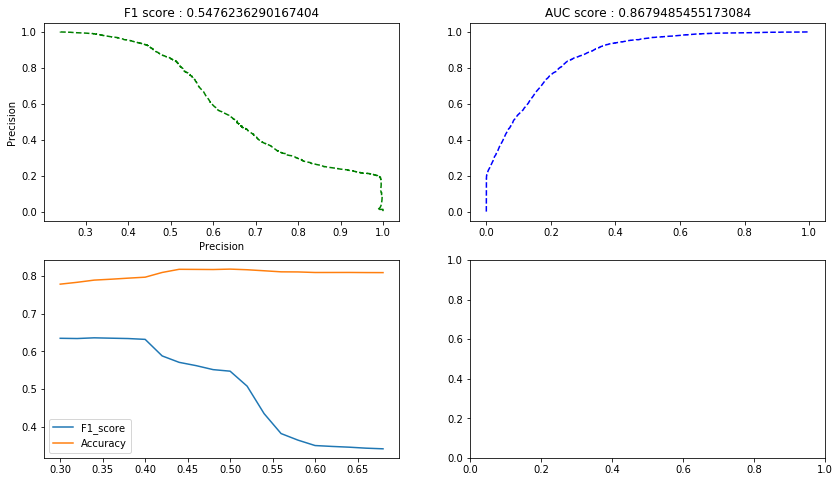

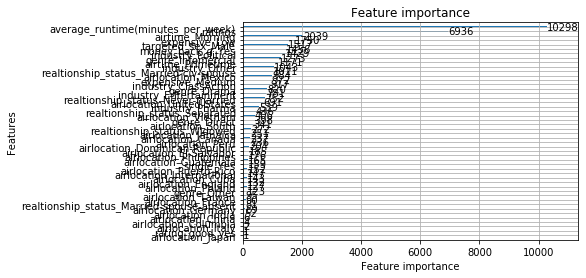

In [113]:
param = dict()
param['objective'] = 'binary'
param['metric'] = 'auc'
param['seed'] = 2019
param['learning_rate'] = 0.005
#xgb.train(num_boost_round=21, eva)
answer = folds(train, train_label, lgb, lg_boost = True, param = param, testset = test)
df_train, df_test = cv_style(train, train_label, lgb.LGBMClassifier(), test)
for i in range(3):
    print(accuracy_score(df_train[i], train_label))

In [114]:
df = pd.Series(np.where(answer>=0.43,True, False))

In [115]:
sample.head()

,id,netgain
0,31820,True
1,10888,True
2,26999,True
3,6912,False
4,10055,False


In [116]:
g = pd.read_csv('Test.csv')
g = pd.DataFrame({'id': g.id, 'netgain': df})

In [117]:
g.to_csv('submission_3.csv', index= False)

In [118]:
g.head()

,id,netgain
0,1,False
1,4,False
2,5,False
3,9,False
4,10,False


In [119]:
g.netgain.value_counts()

False    5024
True     1489
Name: netgain, dtype: int64